# Ashley Mersman
## WordCloud_Mersman
## Bonus
02/21/2023

Basic wordcloud generator with mask and color matching using taylor swift lyrics

In [1]:
#import needed libraries for wordcloud 
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_gradient_magnitude

import wordcloud

In [ ]:

# Read the whole text.
#text from https://github.com/irenetrampoline/taylor-swift-lyrics/blob/master/all_tswift_lyrics.txt
text = open('song_lyrics.txt').read()


# read the mask image
# taken from:
# https://www.pngmart.com/image/13764/png/13763
image = np.array(Image.open("taylor.png"))

#store copy of image as mask
image_mask = image.copy()

#create stopwords variable
stopwords = set(wordcloud.STOPWORDS)


image[image_mask.sum(axis=2) == 0] = 255

edges = np.mean([gaussian_gradient_magnitude(image[:, :, i] / 255., 2) for i in range(3)], axis=0)
image_mask[edges > .1] = 255


#generate wordcloud
wc = wordcloud.WordCloud(background_color='white', mask=image_mask, mode='RGBA', stopwords=stopwords)
wc.generate(text)

#recolor words using colors from image
image_colors = wordcloud.ImageColorGenerator(image)
wc.recolor(color_func=image_colors)

#plot image
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
wc.to_file("taylor_swift.png")


# # store to file
# wc.to_file("taylor_wordcloud.jpeg")

# # show
# plt.imshow(wc, interpolation='bilinear')
# plt.axis("off")
# plt.figure()
# plt.imshow(image_mask, cmap=plt.cm.gray, interpolation='bilinear')
# plt.axis("off")
# plt.show()




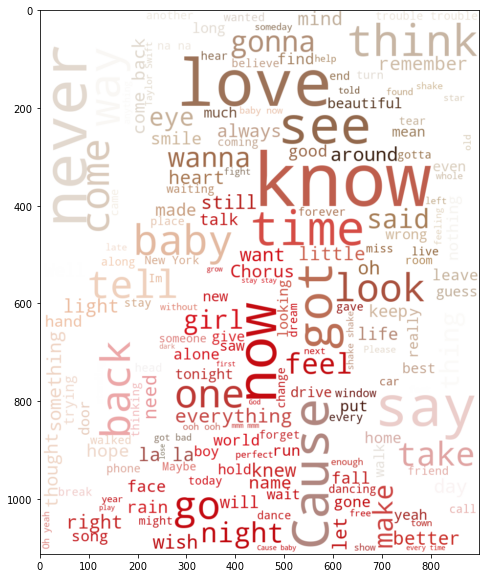